In [10]:
import numpy as np
import pandas as pd

In [11]:
movies=pd.read_csv(r"c:\Users\LENOVO\Downloads\final project\ml-latest-small\movies.csv")
ratings=pd.read_csv(r"c:\Users\LENOVO\Downloads\final project\ml-latest-small\ratings.csv")

In [12]:
movies.shape


(9742, 3)

In [13]:
ratings.shape

(100836, 4)

In [14]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
ratings['userId'].nunique()

610

In [17]:
df=pd.merge(movies,ratings,on='movieId')

In [18]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [19]:
x=df.groupby('title').count()['rating']>100
x[x]

title
2001: A Space Odyssey (1968)                  True
Ace Ventura: Pet Detective (1994)             True
Aladdin (1992)                                True
Alien (1979)                                  True
Aliens (1986)                                 True
                                              ... 
Usual Suspects, The (1995)                    True
WALL·E (2008)                                 True
Waterworld (1995)                             True
Willy Wonka & the Chocolate Factory (1971)    True
X-Men (2000)                                  True
Name: rating, Length: 134, dtype: bool

In [20]:
famous_movies=x[x].index
famous_movies

Index(['2001: A Space Odyssey (1968)', 'Ace Ventura: Pet Detective (1994)',
       'Aladdin (1992)', 'Alien (1979)', 'Aliens (1986)',
       'Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)',
       'American Beauty (1999)', 'American History X (1998)',
       'American Pie (1999)', 'Apocalypse Now (1979)',
       ...
       'True Lies (1994)', 'Truman Show, The (1998)',
       'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', 'Twister (1996)',
       'Up (2009)', 'Usual Suspects, The (1995)', 'WALL·E (2008)',
       'Waterworld (1995)', 'Willy Wonka & the Chocolate Factory (1971)',
       'X-Men (2000)'],
      dtype='object', name='title', length=134)

In [21]:
new_df=df[df['title'].isin(famous_movies)]

In [22]:
agg_ratings=new_df.groupby('title').agg(mean_rating=('rating','mean'),num_of_rating=('rating','count')).reset_index()

In [23]:
agg_ratings

,title,mean_rating,num_of_rating
0,2001: A Space Odyssey (1968),3.894495,109
1,Ace Ventura: Pet Detective (1994),3.040373,161
2,Aladdin (1992),3.792350,183
3,Alien (1979),3.969178,146
4,Aliens (1986),3.964286,126
...,...,...,...
129,"Usual Suspects, The (1995)",4.237745,204
130,WALL·E (2008),4.057692,104
131,Waterworld (1995),2.913043,115
132,Willy Wonka & the Chocolate Factory (1971),3.873950,119


In [24]:
import seaborn as sns

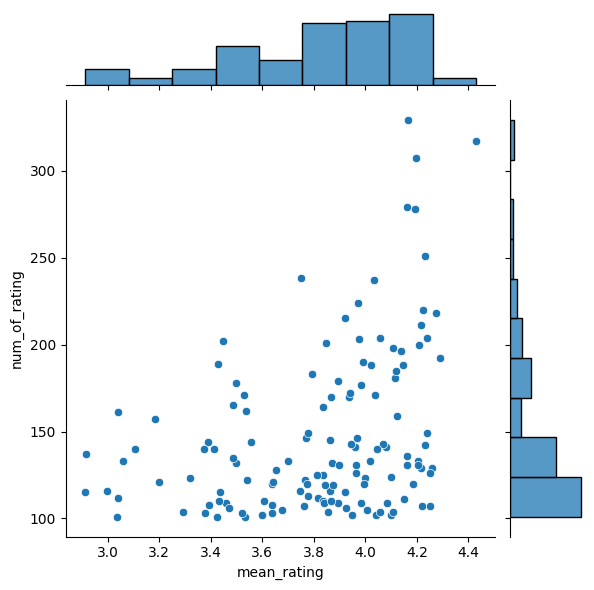

In [25]:
sns.jointplot(x='mean_rating',y='num_of_rating',data=agg_ratings)

we can see an upward trend from the scatter plot, showing that popular movies get higher ratings.

The average rating distribution shows that most movies in the dataset have an average rating of around 4.

The number of rating distribution shows that most movies have less than 150 ratings.

In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19788 entries, 0 to 91498
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movieId    19788 non-null  int64  
 1   title      19788 non-null  object 
 2   genres     19788 non-null  object 
 3   userId     19788 non-null  int64  
 4   rating     19788 non-null  float64
 5   timestamp  19788 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ MB


In [27]:
matrix = new_df.pivot_table(index='userId', columns='title', values='rating')
matrix.head()

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,3.0,NaN,5.0,NaN,NaN,5.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN
5,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN


In [28]:
matrix_norm = matrix.subtract(matrix.mean(axis=1),axis='rows')
matrix_norm.head()

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,-0.392857,NaN,NaN,0.607143,0.607143,NaN,-0.392857,...,NaN,NaN,NaN,-1.392857,NaN,0.607143,NaN,NaN,0.607143,0.607143
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.617647,NaN,NaN,NaN,1.617647,NaN,NaN,NaN,...,NaN,NaN,-1.382353,NaN,NaN,NaN,NaN,NaN,0.617647,NaN
5,NaN,-0.461538,0.538462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.461538,NaN,NaN,NaN,NaN,0.538462,NaN,NaN,NaN,NaN


In [29]:
user_similarity = matrix_norm.T.corr()
user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,NaN,0.391797,0.180151,-0.439941,-0.029894,0.464277,1.0,-0.037987,...,0.091574,0.254514,0.101482,-0.500000,0.780020,0.303854,-0.012077,0.242309,-0.175412,0.071553
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,-0.583333,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.229416,NaN,0.765641
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.391797,NaN,NaN,1.000000,-0.394823,0.421927,0.704669,0.055442,NaN,0.360399,...,-0.239325,0.562500,0.162301,-0.158114,0.905134,0.021898,-0.020659,-0.286872,NaN,-0.050868
5,0.180151,NaN,NaN,-0.394823,1.000000,-0.006888,0.328889,0.030168,NaN,-0.777714,...,0.000000,0.231642,0.131108,0.068621,-0.245026,0.377341,0.228218,0.263139,0.384111,0.040582


In [36]:
picked_userId=int(input("enter any userId to recommend "))
user_similarity.drop(index=picked_userId, inplace=True)
n=10
similarity_threshold=0.3
similar_users = user_similarity[user_similarity[picked_userId]>similarity_threshold][picked_userId].sort_values(ascending=False)[:n]
picked_userid_watched = matrix_norm[matrix_norm.index == picked_userId].dropna(axis=1, how='all')
similar_user_movies = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_movies.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')
item_score = {}


for i in similar_user_movies.columns:
  movie_rating = similar_user_movies[i]
  total = 0
  count = 0
  for u in similar_users.index:
    
    if pd.isna(movie_rating[u]) == False:
      score = similar_users[u] * movie_rating[u]
      total += score
      count +=1
  item_score[i] = total / count

item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])
    

ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)

m = 10

avg_rating = matrix[matrix.index == picked_userId].T.mean()[picked_userId]

ranked_item_score['predicted_rating'] = ranked_item_score['movie_score'] + avg_rating

ranked_item_score.head(m)

enter any userId to recommend 1


,movie,movie_score,predicted_rating
16,Harry Potter and the Chamber of Secrets (2002),1.888889,6.281746
13,Eternal Sunshine of the Spotless Mind (2004),1.888889,6.281746
6,"Bourne Identity, The (2002)",0.888889,5.281746
29,Ocean's Eleven (2001),0.888889,5.281746
18,Inception (2010),0.587491,4.980348
3,"Beautiful Mind, A (2001)",0.466667,4.859524
5,Blade Runner (1982),0.466667,4.859524
12,Donnie Darko (2001),0.466667,4.859524
10,"Departed, The (2006)",0.256727,4.649584
31,"Shawshank Redemption, The (1994)",0.222566,4.615423


In [31]:
import pickle

In [32]:
pickle.dump(new_df,open('new_df.pkl','wb'))

In [33]:
pickle.dump(user_similarity,open('user_similarity.pkl','wb'))

In [34]:
pickle.dump(matrix_norm,open('matrix_norm.pkl','wb'))

In [35]:
pickle.dump(matrix,open('matrix.pkl','wb'))